In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
iris = load_iris()


# Preprocessing

In [ ]:
X = iris.data  # Features
y = iris.target  #species
feature_names = iris.feature_names

In [6]:
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

In [14]:
print("Mean of features after scaling:", np.mean(iris_scaled, axis=0))
print("Standard deviation of features after scaling:", np.std(iris_scaled, axis=0))

Mean of features after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Standard deviation of features after scaling: [1. 1. 1. 1.]


# PCA Analysis

In [7]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

In [8]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)

In [ ]:
pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
pca_df['species'] = pd.Categorical.from_codes(y, iris.target_names) # Add target  column

In [19]:
pca_df

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


# Visualisation

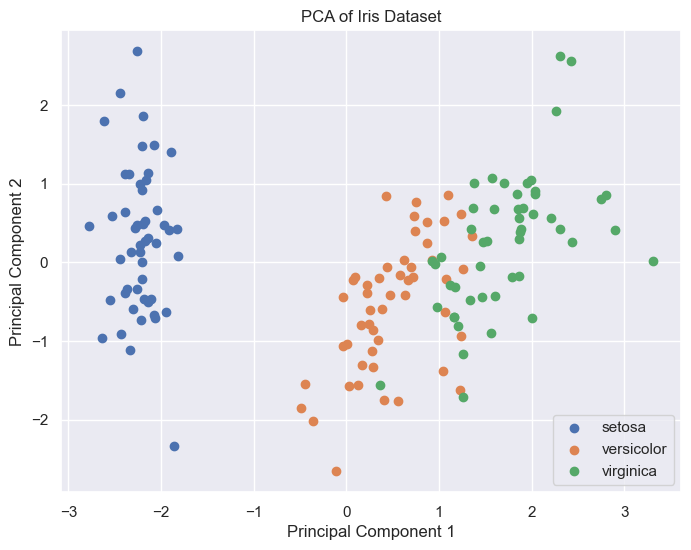

In [18]:
plt.figure(figsize=(8, 6))
for species in iris.target_names:
    species_data = pca_df[pca_df['species'] == species]
    plt.scatter(species_data['PC1'], species_data['PC2'], label=species)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()